# Kunskapskontroll 3

### Task
In 'Kunskapskontroll 3', the task is to carry out an Exploratory Data Analysis (EDA) on the data set `housing.csv`, reporting takes place with visualisations, calculations, checking if there are missing values in 'housing.csv'.
The dataset contains information about houses in California. 

### Purpose and goals
The goal is that the script should be readable and that the analysis of the data should be clear. For example: Which houses are more expensive/cheaper? Why?:
- Examining patterns in the data, such as the relationship between house prices and median income.
- Identify which areas have the most expensive and the cheapest houses.
- Visualize important relationships and patterns in the dataset.

### Questions
The analysis will focus on answering the following questions:
1. How are house prices distributed in the dataset? Are there clear patterns?
2. How does median income affect house prices?
3. Are houses near the sea generally more expensive than houses further from the sea?
4. Are there missing values in the data set and how can these be handled?

### Data source
The dataset `housing.csv` contains approximately 20,000 rows with the following columns:
- **longitude**: The longitude of the location.
- **latitude**: The latitude of the location.
- **housing_median_age**: The median age of the houses in the area.
- **total_rooms**: Total number of rooms in the area.
- **total_bedrooms**: Total number of bedrooms in the area.
- **population**: The size of the population in the area.
- **households**: Number of households in the area.
- **median_income**: The median income in the area.
- **median_house_value**: The median house price in the area.
- **ocean_proximity**: Proximity to the ocean, categorical variable.

### Structure of the analysis
The analysis will be divided into the following steps:
1. **Data exploration**: Check the dataset, identify missing values.
2. **Visualizations**: Create graphs to understand important relationships.
3. **Calculations**: Perform grouping, filtering, and aggregation to analyze house prices.
4. **Reflection and conclusions**: Summarize insights and suggest improvements.

---




## 1. **Data exploration**

#### **Methods Used:**

#### **Dataset Informationm:**

- `pandas.read_csv()` - Reads the dataset into a Pandas DataFrame.
- `DataFrame.head()` - Displays the first 5 rows of the dataset.
- `DataFrame.info()` - Summarizes data types, columns, and value counts.
- `DataFrame.describe()` - Provides a statistical summary of numeric columns.

#### **Identifying Missing Values:**

- `DataFrame.isnull()` - Identifies missing values in the dataset.
- `DataFrame.sum()` - Sums up the missing values for each column.
- `len()` - Counts the total number of rows in the dataset.

#### **Handling Missing Values:**

- `DataFrame.median()` - Calculates the median value for a column.
- `DataFrame.fillna()` - Fills missing values with a specified value (e.g., median).
---


#### Reads the dataset - pandas.read_csv()

In [8]:
# Imports required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # Seaborn simplifies visualizations

# Load data from housing.csv
df_housing_data = pd.read_csv('housing.csv') 

---
#### Printing rows - DataFrame.head()

In [10]:
print(df_housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


---
#### Dataset Information - DataFrame.info()

In [12]:
print(df_housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


---
#### Dataset Information - DataFrame.describe()

In [17]:
print(df_housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

---
#### Missing Values
**Identify Missing Values:** `DataFrame.isnull()`
**Sum Up Missing Values:** `DataFrame.sum()`
**Count Total Rows:** `len()`

In [20]:
missing_values = df_housing_data.isnull().sum()  # Counts missing values per column
print('Missing values in each column:\n', missing_values)

print()

# Display proportion of missing values [%]
total_rows = len(df_housing_data)
missing_percentage = (missing_values / total_rows) * 100
print('Proportion of missing values in percent:\n', missing_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Proportion of missing values in percent:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


---
#### Handle missing values
**Calculates the median:** `DataFrame.median()`
**Fills missing values:** `DataFrame.fillna()`

In [23]:
# Fills missing values in the 'total_bedrooms' column with the median
median_bedrooms = df_housing_data['total_bedrooms'].median()  # Calculates the median of all existing values and saves this
df_housing_data['total_bedrooms'] = df_housing_data['total_bedrooms'].fillna(median_bedrooms) # The fillna method looks for all NaN values and replaces them with median_bedrooms

# Check that there are no more missing values
print('Missing values after action:\n', df_housing_data.isnull().sum())


Missing values after action:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## 2. Visualizations

To explore the data, four visualizations were created, each implemented as a function.


### Methods Used

1. **Histogram**  
   - **Purpose:** Show the distribution of `median_house_value`.  
   - **Key Method:** `ax.hist()`  
   - **Function:** `plot_histogram()`

2. **Scatter Plot**  
   - **Purpose:** Visualize the relationship between `median_income` and `median_house_value`.  
   - **Key Method:** `ax.scatter()`  
   - **Function:** `plot_scatter()`

3. **Heatmap**  
   - **Purpose:** Display correlations between numeric variables.  
   - **Key Method:** `sns.heatmap()`  
   - **Function:** `plot_heatmap()`

4. **Boxplot**  
   - **Purpose:** Show how `median_house_value` varies by `ocean_proximity`.  
   - **Key Method:** `sns.boxplot()`  
   - **Function:** `plot_boxplot()`



### Insights

1. **Histogram:** Most house prices are below `$250,000`. The upper limit of `$500,000` in the dataset suggests a possible cap on house prices.  
2. **Scatter Plot:** Strong positive correlation between income and house prices.  
3. **Heatmap:** `median_income` has the strongest correlation with house prices (~0.69).  
4. **Boxplot:** Houses closer to the ocean tend to have higher median prices, especially on islands.
---

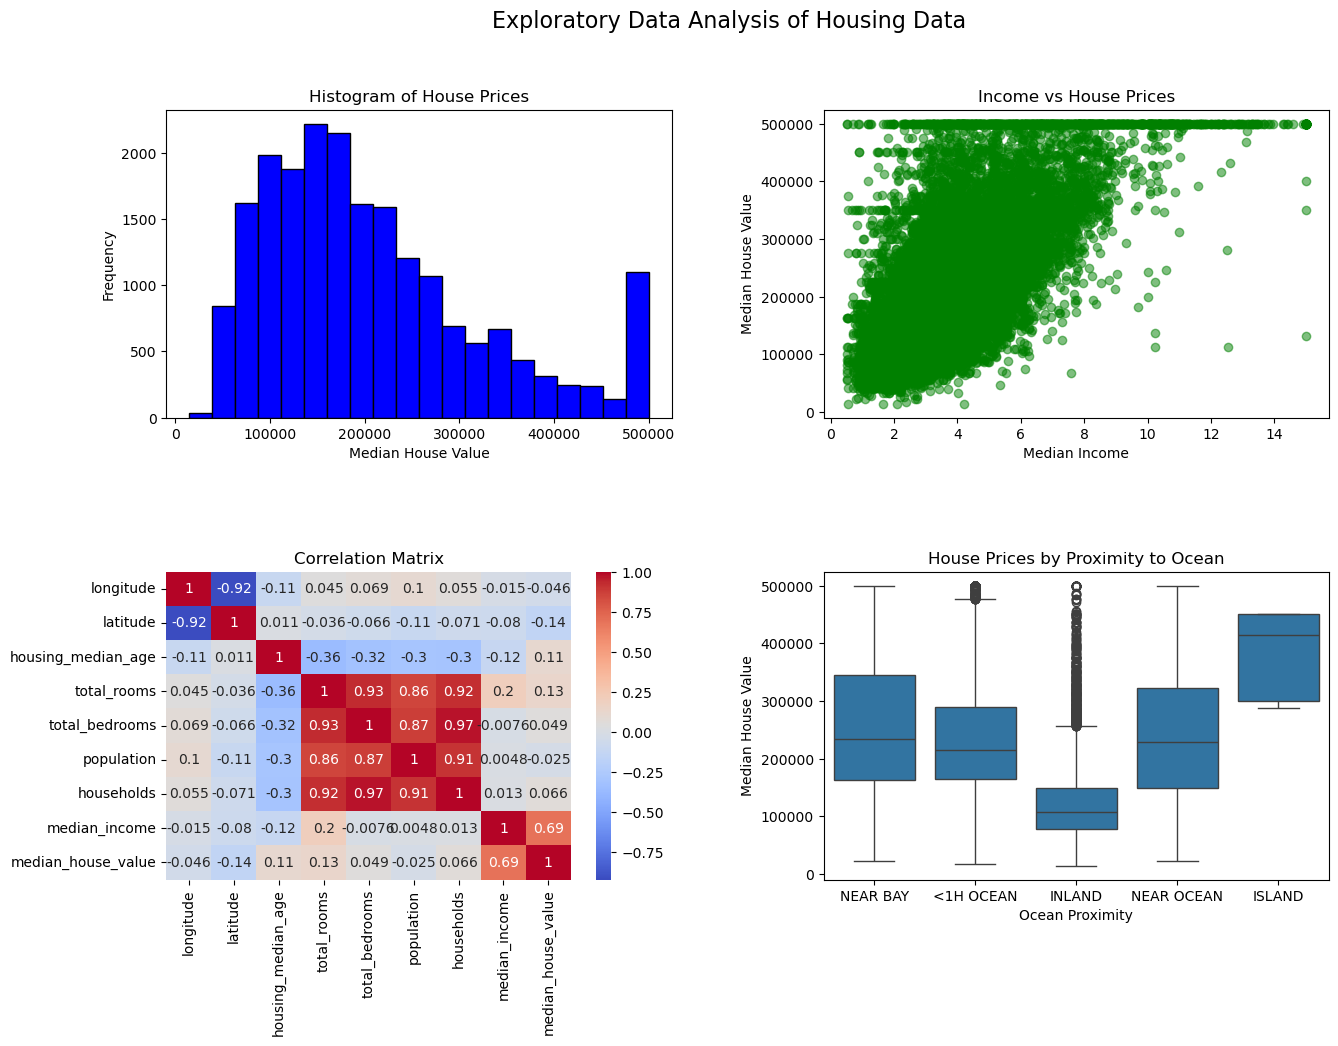

In [26]:
# Function for Histogram
def plot_histogram(ax, data, column, title, xlabel, ylabel, bins=20, color='blue'):
    ax.hist(data[column], bins=bins, color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Scatter plot function
def plot_scatter(ax, data, x_col, y_col, title, xlabel, ylabel, color='green', alpha=0.5):
    ax.scatter(data[x_col], data[y_col], color=color, alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Function for Heatmap
def plot_heatmap(ax, data, title, cmap='coolwarm'):
    numerical_data = df_housing_data.select_dtypes(include=['float64', 'int64']) # Create a new DataFrame with only numeric columns
    correlation_matrix = numerical_data.corr() # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, ax=ax)
    ax.set_title(title)

# Boxplot function
def plot_boxplot(ax, data, x_col, y_col, title, xlabel, ylabel):
    sns.boxplot(x=data[x_col], y=data[y_col], ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=False)
fig.suptitle('Exploratory Data Analysis of Housing Data', fontsize=16)

# Call the functions for each subplot
plot_histogram(axs[0, 0], df_housing_data, 'median_house_value', title='Histogram of House Prices', xlabel='Median House Value', ylabel='Frequency')

plot_scatter(axs[0, 1], df_housing_data, 'median_income', 'median_house_value', title='Income vs House Prices', xlabel='Median Income', ylabel='Median House Value')

plot_heatmap(axs[1, 0], df_housing_data, title='Correlation Matrix')

plot_boxplot(axs[1, 1], df_housing_data, 'ocean_proximity', 'median_house_value', title='House Prices by Proximity to Ocean', xlabel='Ocean Proximity', ylabel='Median House Value')    


plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the figure
plt.show()


---
## 3. Calculations

#### Methods Used:
- **`groupby()`**: Groups data by categories, such as `ocean_proximity`.
- **`mean()`**: Computes the average value for each group.
- **Comparison Operators (`>`, `<`)**: Filters rows based on conditions.
- **Boolean Indexing**: Applies logical filters to the DataFrame.

#### Calculations:
1. **Median Prices by Ocean Proximity**  
   Calculates average house prices for each `ocean_proximity` category.

2. **Filter Expensive Houses**  
   Extracts houses with `median_house_value > 500,000`.

3. **Filter Cheap Houses**  
   Extracts houses with `median_house_value < 100,000`.




---
#### Median Prices by Ocean Proximity

In [32]:
proximity_prices = df_housing_data.groupby('ocean_proximity')['median_house_value'].mean()
print(proximity_prices)

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


#### Filter Expensive and Cheap Houses

In [36]:
def filter_houses(df, condition, value):
    return df[condition(df['median_house_value'], value)]

expensive_houses = filter_houses(df_housing_data, lambda x, y: x > y, 500000).head() # lambda, an anonymous function that compares if the value x is greater than y.
print('Expensive Houses:\n', expensive_houses.head())

print()

cheap_houses = filter_houses(df_housing_data, lambda x, y: x < y, 100000).head()
print('Cheap Houses:\n', cheap_houses.head())


Expensive Houses:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89     -122.27     37.80                52.0        249.0            78.0   
459    -122.25     37.87                52.0        609.0           236.0   
493    -122.24     37.86                52.0       1668.0           225.0   
494    -122.24     37.85                52.0       3726.0           474.0   
509    -122.23     37.83                52.0       2990.0           379.0   

     population  households  median_income  median_house_value ocean_proximity  
89        396.0        85.0         1.2434            500001.0        NEAR BAY  
459      1349.0       250.0         1.1696            500001.0        NEAR BAY  
493       517.0       214.0         7.8521            500001.0        NEAR BAY  
494      1366.0       496.0         9.3959            500001.0        NEAR BAY  
509       947.0       361.0         7.8772            500001.0        NEAR BAY  

Cheap Houses:
     longitude  l

## 4 Self Evaluation

#### 1. Has anything been challenging in this task? If so, how did you handle it?

Since I have limited programming experience, I faced several challenges in structuring the code efficiently and understanding best practices for exploratory data analysis (EDA). I used ChatGPT extensively—not as a shortcut, but as a very effective teaching assistant. ChatGPT provided clear and educational explanations that helped me understand the concepts and implement solutions effectively. I find this both enjoyable and challenging at the same time, and I realize that more practice is needed.

I dedicated significant time to understanding each part of the code as well as Markdown to ensure that the notebook is clear and well-structured. This effort has allowed me to learn a lot in a short period.

#### 2. What grade do you think you deserve and why?

I have invested considerable time in understanding and completing the task to the best of my ability. I believe I was able to learn and absorb a substantial amount of knowledge in a short time, largely thanks to the support of ChatGPT. I feel that I use ChatGPT in a highly effective way to streamline my learning process and make rapid progress. The effort I have put into both the technical analysis and the presentation demonstrates my commitment, and I believe I have met the requirements for the grade VG.

#### 3. Is there something you want to highlight for Antonio?

I want to emphasize how invaluable ChatGPT has been as a tool for explaining and teaching! It has significantly accelerated my learning process by providing valuable feedback, clarifications, and guidance on coding. This task (Kunskapskontroll 3) has greatly enhanced my understanding of EDA, coding, and Markdown.
